# Token AMR gene overlaps for SAUR

## Read mapping information

In [6]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

,person_id,visit_occurrence_id,TYPE,COUNTRY_OF_BIRTH,SEX,Age_Bin,JOURNEY_ID
0,678487,3312694,Emergency,Australia,Male,"(60, 70]",3312694
1,2094045,9199249,Emergency,Australia,Male,"(20, 30]",9199249
2,2107813,9410987,Emergency,Australia,Male,"(50, 60]",9410987
3,2083212,602890,Inpatient,Australia,Female,"(40, 50]",9039437
4,2083212,9039437,Emergency,Australia,Female,"(40, 50]",9039437
...,...,...,...,...,...,...,...
7194,2603535,16588204,Inpatient,Australia,Male,"(60, 70]",16588204
7195,2603535,16709341,Inpatient,Australia,Male,"(60, 70]",16709341
7196,2603535,16651755,Inpatient,Australia,Male,"(60, 70]",16651755
7197,2098616,16872774,Emergency,Australia,Female,"(80, 90]",16872774


In [7]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [8]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

,person_id,JOURNEY_ID,tube_code
0,50056,13224842,AH20B011
1,62567,12645629,AH19G065
2,138108,14737781,AH21E052
3,211314,13955099,AH20J009
4,211314,13955099,KPN2214
...,...,...,...
512,2084373,16158768,ALF22C004
513,1058066,16759482,ALF22H089
514,2552781,16966609,ALF22J054
515,2638484,16969999,ALF22K143


## Read token files

In [9]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'SAUR')

bedDfs = {}
for bedFile in os.listdir(bedDir):
    df = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    bedDfs[bedFile.split('_')[0]] = df

## Read amrfinder annotations

In [11]:
import os

import pandas as pd

from pathlib import Path


amrfinderDir = Path(os.environ['GENOMICS_DATA_BASE'], 'amrfinder')

overlappingDfList = []

for tubeId, bedDf in bedDfs.items():
    amrfinderFile = Path(amrfinderDir, tubeId + '_amr_results.txt')
    if(amrfinderFile.exists()):
        amrfinderDf = pd.read_csv(amrfinderFile, sep='\t')
        mergedDf = bedDf.merge(
            amrfinderDf,
            how='inner',
            left_on = ['contig_id'],
            right_on = ['Contig id'],
        )
        mergedDf['tube_code'] = tubeId
        tempOverlappingDf = mergedDf[(mergedDf.start_position >= mergedDf.Start) & (mergedDf.end_position <= mergedDf.Stop)]
        overlappingDfList.append(tempOverlappingDf)

overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf

,contig_id,start_position,end_position,tokens,score,Protein identifier,Contig id,Start,Stop,Strand,...,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,tube_code
0,1,127491,127493,TCT,-0.000798,NaN,1,127488,128840,-,...,451,451,100.0,99.33,451,AAU95768.1,multidrug efflux MATE transporter MepA,NaN,NaN,ALF22G140
1,1,127494,127499,ATTAAT,-0.000693,NaN,1,127488,128840,-,...,451,451,100.0,99.33,451,AAU95768.1,multidrug efflux MATE transporter MepA,NaN,NaN,ALF22G140
2,1,127500,127504,TCAGA,-0.000929,NaN,1,127488,128840,-,...,451,451,100.0,99.33,451,AAU95768.1,multidrug efflux MATE transporter MepA,NaN,NaN,ALF22G140
3,1,127505,127509,TGTAT,0.000146,NaN,1,127488,128840,-,...,451,451,100.0,99.33,451,AAU95768.1,multidrug efflux MATE transporter MepA,NaN,NaN,ALF22G140
4,1,127510,127515,CAACTG,-0.000729,NaN,1,127488,128840,-,...,451,451,100.0,99.33,451,AAU95768.1,multidrug efflux MATE transporter MepA,NaN,NaN,ALF22G140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992328,5,152500,152501,CG,-0.001348,NaN,5,152451,152528,-,...,26,26,100.0,100.00,26,AGU62139.1,delta-hemolysin,NaN,NaN,AH21C044
992329,5,152502,152506,ATTGT,-0.000570,NaN,5,152451,152528,-,...,26,26,100.0,100.00,26,AGU62139.1,delta-hemolysin,NaN,NaN,AH21C044
992330,5,152507,152514,TGAAATGA,-0.000510,NaN,5,152451,152528,-,...,26,26,100.0,100.00,26,AGU62139.1,delta-hemolysin,NaN,NaN,AH21C044
992331,5,152515,152519,TATCT,-0.000209,NaN,5,152451,152528,-,...,26,26,100.0,100.00,26,AGU62139.1,delta-hemolysin,NaN,NaN,AH21C044


## All overlap analysis

### Feature type wise overlapping counts

In [16]:
overlappingDf['Element type'].value_counts()

Element type
VIRULENCE    667104
AMR          265478
STRESS        59751
Name: count, dtype: int64

<Axes: xlabel='Element type'>

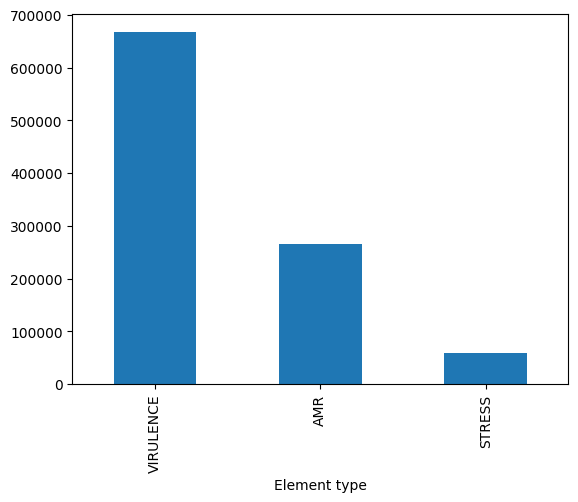

In [17]:
overlappingDf['Element type'].value_counts().plot(kind = 'bar')

### Overall

In [26]:
overlappingDf[['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
4,aur,zinc metalloproteinase aureolysin,124679
68,tet(38),tetracycline efflux MFS transporter Tet(38),109300
36,mepA,multidrug efflux MATE transporter MepA,87862
25,icaC,polysaccharide intercellular adhesin biosynthe...,80404
23,hlgB,bi-component gamma-hemolysin HlgAB/HlgCB subun...,67577
24,hlgC,bi-component gamma-hemolysin HlgCB subunit C,66919
22,hlgA,bi-component gamma-hemolysin HlgAB subunit A,65375
26,lmrS,multidrug efflux MFS transporter LmrS,54868
10,cna,collagen adhesin Cna,30419
52,sel26,staphylococcal enterotoxin type 26,28544


### Virulence

In [27]:
overlappingDf[overlappingDf['Element type'] == 'VIRULENCE'][['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
0,aur,zinc metalloproteinase aureolysin,124679
8,icaC,polysaccharide intercellular adhesin biosynthe...,80404
6,hlgB,bi-component gamma-hemolysin HlgAB/HlgCB subun...,67577
7,hlgC,bi-component gamma-hemolysin HlgCB subunit C,66919
5,hlgA,bi-component gamma-hemolysin HlgAB subunit A,65375
1,cna,collagen adhesin Cna,30419
25,sel26,staphylococcal enterotoxin type 26,28544
10,lukE,bi-component leukocidin LukED subunit E,18539
26,selX,staphylococcal enterotoxin-like toxin X,16346
9,lukD,bi-component leukocidin LukED subunit D,14403


### AMR

In [28]:
overlappingDf[overlappingDf['Element type'] == 'AMR'][['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
18,tet(38),tetracycline efflux MFS transporter Tet(38),109300
17,mepA,multidrug efflux MATE transporter MepA,87862
3,blaR1,beta-lactam sensor/signal transducer BlaR1,13778
13,mecA,PBP2a family beta-lactam-resistant peptidoglyc...,13189
10,fosB,FosB1/FosB3 family fosfomycin resistance bacil...,13024
16,mecR1,beta-lactam sensor/signal transducer MecR1,6880
4,blaZ,penicillin-hydrolyzing class A beta-lactamase ...,5562
2,blaPC1,BlaZ family penicillin-hydrolyzing class A bet...,4575
1,blaI,penicillinase repressor BlaI,4533
0,ant(9)-Ia,aminoglycoside nucleotidyltransferase ANT(9)-Ia,1274


### Stress

In [29]:
overlappingDf[overlappingDf['Element type'] == 'STRESS'][['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
4,lmrS,multidrug efflux MFS transporter LmrS,54868
3,cadD,cadmium resistance transporter CadD,1485
0,arsB,arsenite efflux transporter membrane subunit ArsB,1154
5,mco,multi-copper oxidase Mco,1104
1,arsC,thioredoxin-dependent arsenate reductase,345
6,merA,mercury(II) reductase,325
2,arsR,As(III)-sensing metalloregulatory transcriptio...,276
7,merB,organomercurial lyase MerB,128
8,merT,mercuric transport protein MerT,66


## High-score overlap analysis

### Obtain high-score cutoff

In [36]:
highscoreCutoff = overlappingDf.score.mean() + 2 * overlappingDf.score.std()
highscoreCutoff

np.float64(0.007911849104450388)

### Create overlaps dataframe for high-score genes

In [37]:
highscoreOverlappingDf = overlappingDf[overlappingDf.score > highscoreCutoff]
highscoreOverlappingDf

,contig_id,start_position,end_position,tokens,score,Protein identifier,Contig id,Start,Stop,Strand,...,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,tube_code
487,3,92632,92637,TGAAGT,0.016457,NaN,3,92622,93371,+,...,250,250,100.0,94.80,250,KAG18833.1,staphylococcal enterotoxin type 26,NaN,NaN,ALF22G140
504,3,92734,92739,TAAACT,0.012154,NaN,3,92622,93371,+,...,250,250,100.0,94.80,250,KAG18833.1,staphylococcal enterotoxin type 26,NaN,NaN,ALF22G140
535,3,92910,92915,CAAAGA,0.009266,NaN,3,92622,93371,+,...,250,250,100.0,94.80,250,KAG18833.1,staphylococcal enterotoxin type 26,NaN,NaN,ALF22G140
537,3,92923,92927,AAATA,0.008968,NaN,3,92622,93371,+,...,250,250,100.0,94.80,250,KAG18833.1,staphylococcal enterotoxin type 26,NaN,NaN,ALF22G140
571,3,93110,93114,AAAAC,0.013360,NaN,3,92622,93371,+,...,250,250,100.0,94.80,250,KAG18833.1,staphylococcal enterotoxin type 26,NaN,NaN,ALF22G140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990152,1,464433,464437,GCCGC,0.010186,NaN,1,464367,465893,-,...,509,509,100.0,99.21,509,EHO93748.1,zinc metalloproteinase aureolysin,NaN,NaN,AH21C044
990172,1,464540,464543,TTGA,0.013898,NaN,1,464367,465893,-,...,509,509,100.0,99.21,509,EHO93748.1,zinc metalloproteinase aureolysin,NaN,NaN,AH21C044
990200,1,464692,464697,CAGGTG,0.009635,NaN,1,464367,465893,-,...,509,509,100.0,99.21,509,EHO93748.1,zinc metalloproteinase aureolysin,NaN,NaN,AH21C044
991832,5,67731,67737,AAAATGT,0.008331,NaN,5,67713,68090,-,...,126,126,100.0,96.83,126,WP_001284656.1,penicillinase repressor BlaI,NaN,NaN,AH21C044


### Feature type wise overlapping counts

In [38]:
overlappingDf['Element type'].value_counts()

Element type
VIRULENCE    667104
AMR          265478
STRESS        59751
Name: count, dtype: int64

In [40]:
highscoreOverlappingDf['Element type'].value_counts()

Element type
VIRULENCE    2092
AMR          1338
STRESS         97
Name: count, dtype: int64

<Axes: xlabel='Element type'>

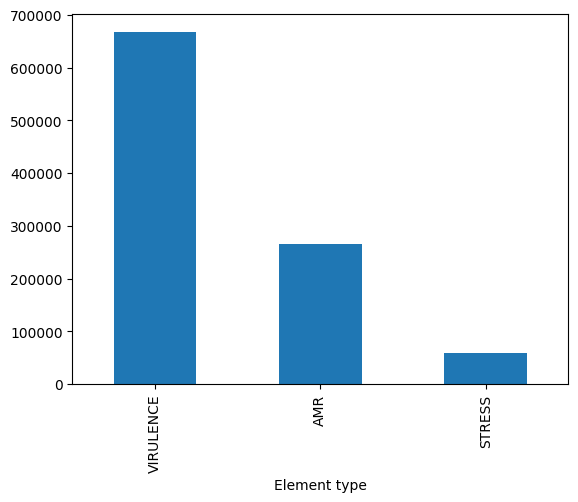

In [39]:
overlappingDf['Element type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Element type'>

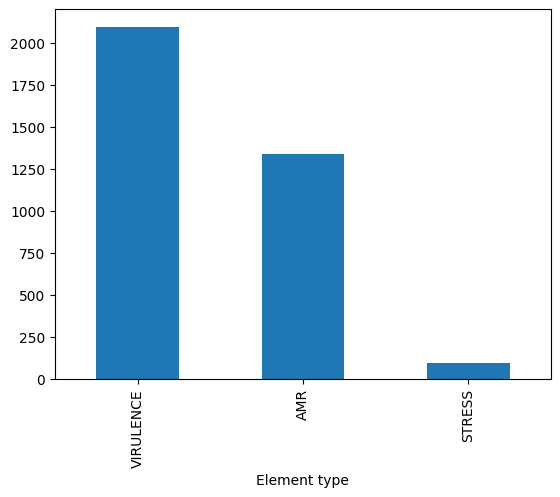

In [41]:
highscoreOverlappingDf['Element type'].value_counts().plot(kind = 'bar')